<p align="right"><i>Data Analysis for the Social Sciences - Part II - 2023-11-28</i></p>

# Week 12 - Publication-Ready Graphs

Welcome to Part II of Data Analysis for the Social Sciences. In this lab session we will produce professional-looking graphs for inclusion in academic outputs (e.g., reports, journal articles).

We will use real data from the *British Social Attitudes survey, 2019: Poverty and Welfare*, specifically the open dataset available from the UK Data Service: https://doi.org/10.5255/UKDA-SN-8850-1

We will structure our analyses around the following research question:

<p><center><i>Are attitudes to welfare associated with sex, age, interest in politics, and perception of benefits fraud?</i></center></p>

### Aims

This lesson - **Publication-Ready Graphs** - has two aims:
1. Demonstrate how to produce graphs suitable for inclusion in academic outputs.
2. Cultivate your computational skills through the use of the statistical programming langauge *R*. For example, there are a number of opportunities for you to amend or write R syntax (code).

### Lesson details

* **Level**: Introductory, for individuals with minimal prior knowledge or experience of quantitative data analysis.
* **Duration**: 45-60 minutes.
* **Pre-requisites**: Completed [*Univariate Data Analysis*](./dass-week-9-univariate-analysis.ipynb), [*Bivariate Data Analysis*](./dass-week-10-bivariate-analysis.ipynb) and [*Multivariate Data Analysis*](./dass-week-11-multivariate-analysis.ipynb) lessons.
* **Programming language**: R.
* **Learning outcomes**:
	1. Understand how to use R to produce and improve visualisations of statistical analyses.
	2. Understand how to select and apply common visualisation techniques and formats for categorical and numeric variables.

## Guide to using this resource

This learning resource was built using <a href="https://jupyter.org/" target=_blank>Jupyter Notebook</a>, an open-source software application that allows you to mix code, results and narrative in a single document. As <a href="https://jupyter4edu.github.io/jupyter-edu-book/" target=_blank>Barba et al. (2019)</a> espouse:
> In a world where every subject matter can have a data-supported treatment, where computational devices are omnipresent and pervasive, the union of natural language and computation creates compelling communication and learning opportunities.

If you are familiar with Jupyter notebooks then skip ahead to the main content (*Introduction to multivariate data analysis*). Otherwise, the following is a quick guide to navigating and interacting with the notebook.

### Interaction

**You only need to execute the code that is contained in sections which are marked by `[]`.**

To execute a cell, click or double-click the cell and press the `Play` button next to the cell or select the `Run` button on the top toolbar (*Runtime > Run the focused cell*); you can also use the keyboard shortcuts `Shift + Enter` or `Ctrl + Enter`).

Try it for yourself:

In [ ]:
name <- readline(prompt="Enter name: ")
print(paste("Hi,", name, "enjoy learning more about R and multivariate analysis!"))

Notebooks are sequential, meaning code should be executed in order (top to bottom). For example, the following code won't work:

In [ ]:
x * 5

As the error message suggests, there is no object (variable) called `x`, therefore we cannot do any calculations with it. 

Let's try a sequential approach:

In [ ]:
x <- 10 # create an object called 'x' and give it the value '10'

In [ ]:
x * 5 # multiply 'x' by 5

### Learn more

Jupyter notebooks provide rich, flexible features for conducting and documenting your data analysis workflow. To learn more about additional notebook features, we recommend working through some of the <a href="https://github.com/darribas/gds19/blob/master/content/labs/lab_00.ipynb" target=_blank>materials</a> provided by Dani Arribas-Bel at the University of Liverpool. 

### Learner input

Throughout the lessons there are times when you need to do the following activities:
* **TASK:** A coding task for you to complete (e.g. analyse different variables).
* **QUESTION:** A question regarding your interpretation of some code or a technique (e.g. what is the piece of code doing?).
* **EXERCISE:** A data analysis challenge for you to complete.

## Introduction to visualisation

In our previous analyses we produced a range of visualisations (graphs and tables) to explore the distribution of single variables and summarise associations between two or more variables. The resulting visualisations were basic and often adopted the default colour and font schemes, did not include titles or axis labels, legends or notes explaining the contents of the graph etc. 

In this lesson we focus on how to produce visualisations that are of sufficient quality for including in academic outputs, including your assessment report. We will do this in two ways:
1. With base *R* i.e., using commands that come as standard with the *R* programming language
2. With `ggplot2` i.e., using commands written and shared by other *R* users to improve the quality of base *R* graphs

The latter is more powerful and flexible, giving you a tremendous number of options for customising your visualisations. However it does require you to install a new package (`ggplot2`) and learn how to write commands using a different 'grammar'. Base *R* offers less flexibility and fewer options, but is simpler to write and can still produce clean, informative visualisations.

The choice of approach is completely up to you.

## Visualising distributions

### Preliminaries

We need to install some additional packages to improve our visualisations. The first grants access to a suite of colour schemes (palettes) we can use to distinguish categories in a bar chart for example. The second is the `ggplot2` package that contains a dedicated, flexible set of commands for producing high-quality visualisations. The third is the `cowplot` package that provides a unified theme for your visualisations (e.g., a specific font, text size, colour scheme etc).

*Remove the # symbols before running the `install.packages()` commands*

In [ ]:
# install.packages("RColorBrewer")
# install.packages("ggplot2")
# install.packages("cowplot")

In [ ]:
library(RColorBrewer)
display.brewer.all() # view available colour palettes

In [ ]:
library(ggplot2)

In [ ]:
library(cowplot)

### Importing data

The first step is to import the *British Social Attitudes survey* data for analysis.

In [ ]:
bsa2019 <- read.table("https://raw.githubusercontent.com/DiarmuidM/data-analysis-for-the-social-sciences-2023/main/lessons/data/bsa2019_poverty_open.tab", header=TRUE, na="NA", sep="\t")
head(bsa2019) # view the first six observations

In [ ]:
names(bsa2019)

### Data cleaning

There are a number of important steps that need to be executed before proceeding with the analysis:
* Handling missing values
* Labelling values of categorical variables

We cover these techniques in a separate notebook: [Data Cleaning](./dass-bsa-data-cleaning.ipynb) 

**Please note that you will be expected to perform these tasks for your own analysis.**

In [ ]:
bsa2019$welfare2[bsa2019$welfare2<1 | bsa2019$welfare2>5] <- NA # convert "-1" and "9" to missing

In [ ]:
bsa2019$NatFrEst[bsa2019$NatFrEst>100] <- NA # convert "998" and "999" to missing

In [ ]:
bsa2019$RSex <- factor(bsa2019$RSex, levels = c(1,2), labels = c("Male", "Female"))

In [ ]:
bsa2019$RAgeCat <- factor(bsa2019$RAgeCat, levels = c(1,2,3,4,5,6,7), labels = c("18-24", "25-34", "35-44", "45-54", "55-59", "60-64", "65+"))

In [ ]:
bsa2019$Married <- factor(bsa2019$Married, levels = c(1,2,3,4), labels = c("Married/living as married", 
                                                                               "Separated/divorced", 
                                                                               "Widowed", 
                                                                               "Never married"))

In [ ]:
bsa2019$HEdQual3 <- factor(bsa2019$HEdQual3, levels = c(1,2,3,4), labels = c("Degree", "Below degree / A level", "O level", "No qual"))

### Univariate analyses

#### Categorical variables

##### `base R`

We can make some small tweaks to the techniques we learned in weeks 9-11.

First, generate a frequency table of proportions.

In [ ]:
he_table <- prop.table(table(bsa2019$HEdQual3)) # frequency table of higher education qualifications
he_table

Then select a colour scheme for applying to the bars of your bar chart. Choose as many colours as there are bars:

In [ ]:
bar_colors <- RColorBrewer::brewer.pal(4, "Blues")
bar_colors

Generate your plot and save it.

In [ ]:
png("hed-plot-2023-11-28.png", width = 500, height = 500) # open a file to save your plot = play around with width and height if needed

barplot(he_table, main = "HE Qualifications",
        xlab = "Qualification type", ylab = "Proportion of sample",
        col = bar_colors)

dev.off() # close the file to save your plot

##### `ggplot2`

The first step is to specify essential plot elements (data and variables), and store it as a new object (*p*)

In [ ]:
p <- ggplot(data = bsa2019,
       mapping = aes(x = Married))

Then add on the type of visualisation you want to produce (e.g., bar chart, pie chart)

In [ ]:
p + geom_bar(mapping = aes(y = after_stat(prop), , group = 1)) # graph proportions instead of counts

Finally improve the presentation of the graph using titles, colour schemes etc

In [ ]:
fig1 <- p + geom_bar(mapping = aes(y = after_stat(prop), , group = 1)) +
    coord_flip() + # flip the graph from vertical to horizontal
    theme_cowplot() + # select a visualisation theme - others include theme_bw(), theme_classic()
    labs(x = "Relationship status", y = "Proportion of sample", title = "Distribution of relationship status", subtitle = "", 
         caption = "British Social Attitudes survey 2019, n=3,224") # add labels, titles, notes etc

In [ ]:
fig1

In [ ]:
ggsave("married-plot-2023-11-28.png", plot = fig1, height = 4, width = 8)

#### Numeric variables

##### `base R`

There is a preliminary step to get proportions for a base *R* histogram.

In [ ]:
h = hist(bsa2019$welfare2, plot=FALSE)
h$density = h$counts/sum(h$counts)

In [ ]:
plot(h, freq = FALSE, col = "steelblue", main = "Distribution of attitude to welfare",
    xlab = "Welfare score (1-5)", ylab = "Proportion of sample")

Don't forget to save the plot using the syntax from earlier (saving the higher education qualification bar chart).

##### `ggplot2`

In [ ]:
summary(bsa2019$welfare2)

In [ ]:
p <- ggplot(data = bsa2019,
       mapping = aes(x = welfare2))

In [ ]:
fig2 <- p + geom_histogram(bins = 8, binwidth=.5, color = "black", fill="lightgrey", aes(y=..count../sum(..count..))) + # 
    theme_cowplot() +
    labs(x = "Attitude to welfare", y = "Proportion of sample", title = "Distribution of attitude to welfare", subtitle = "", 
         caption = "British Social Attitudes survey 2019, n=3,224") # add labels, titles, notes etc

In [ ]:
fig2

In [ ]:
ggsave("welfare-plot-2023-11-28.png", plot = fig2, height = 4, width = 8)

### Bivariate analyses

#### Categorical & Categorical variables

##### `base R`

First we create a crosstabulation and save the results in a new object. Note we are showing percentages but these are equivalent to proportions * 100.

In [ ]:
ed_age_table <- round(prop.table(table(bsa2019$RAgeCat, bsa2019$HEdQual3), 1)* 100, 0)
ed_age_table

Select some colours for the seven age categories.

In [ ]:
bar_colors <- RColorBrewer::brewer.pal(7, "Blues")
bar_colors

Generate your plot - don't forget to add in syntax for saving the results.

In [ ]:
barplot(ed_age_perc_table, main="Highest qualification by age group",
  xlab="Type of qualification", ylab="% of sample", col = bar_colors, 
  legend = rownames(ed_age_table), beside=TRUE, args.legend=list(x="topleft", box.lty = 0, cex = 0.8))

##### `ggplot2`

In [ ]:
p <- ggplot(data = bsa2019[!(is.na(bsa2019$HEdQual3)),],
       mapping = aes(x = RAgeCat))

In [ ]:
fig3 <- p + geom_bar(mapping = aes(y = after_stat(prop), , group = 1)) +
    facet_wrap(~ HEdQual3) + guides(fill = "none") +
    theme_cowplot() +
    labs(x = "Age group", y = "Proportion of sample", title = "Distribution of qualifications across age groups", subtitle = "", 
         caption = "British Social Attitudes survey 2019, n=3,224") # add labels, titles, notes etc
    

In [ ]:
fig3

In [ ]:
ggsave("hed-age-plot-2023-11-28.png", plot = fig3, height = 6, width = 8)

#### Categorical & Numeric variables

##### `base R`

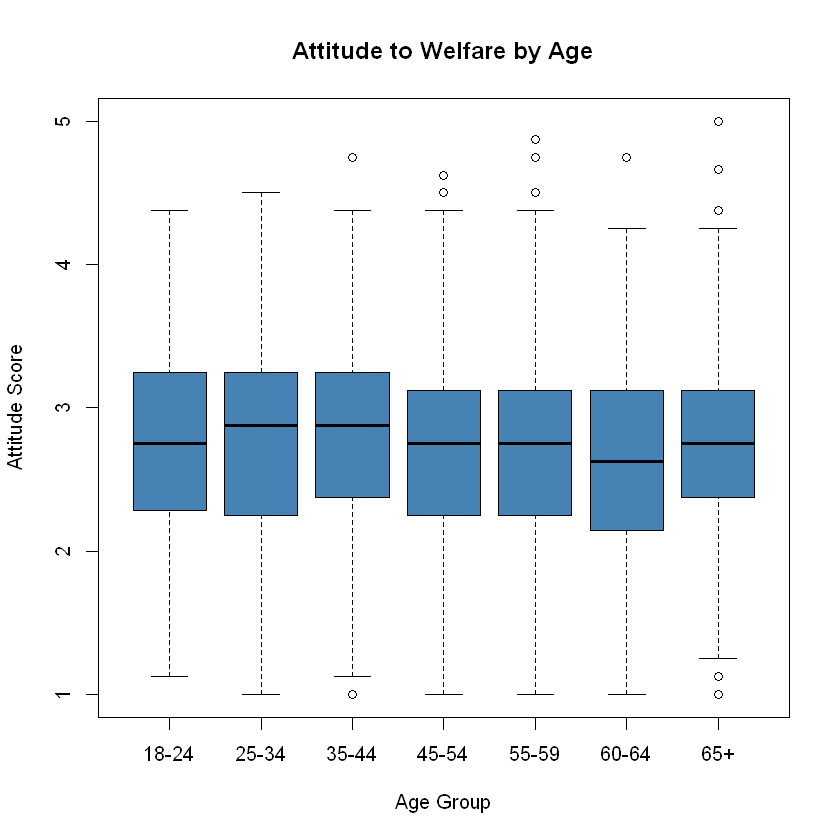

In [133]:
boxplot(welfare2 ~ RAgeCat,
    data = bsa2019,
    main = "Attitude to Welfare by Age",
    xlab = "Age Group",
    ylab = "Attitude Score",
    col = "steelblue",
    border = "black")

##### `ggplot2`

In [138]:
p <- ggplot(data = bsa2019[!(is.na(bsa2019$RAgeCat)),],
       mapping = aes(x = RAgeCat, y = welfare2))

In [140]:
fig4 <- p + geom_boxplot() + 
    theme_cowplot() +
    labs(x = "Age group", y = "Attitude Score", title = "Distribution of welfare attitudes across age groups", subtitle = "", 
         caption = "British Social Attitudes survey 2019, n=3,224") # add labels, titles, notes etc

Warning message:
"Removed 639 rows containing non-finite values (`stat_boxplot()`)."


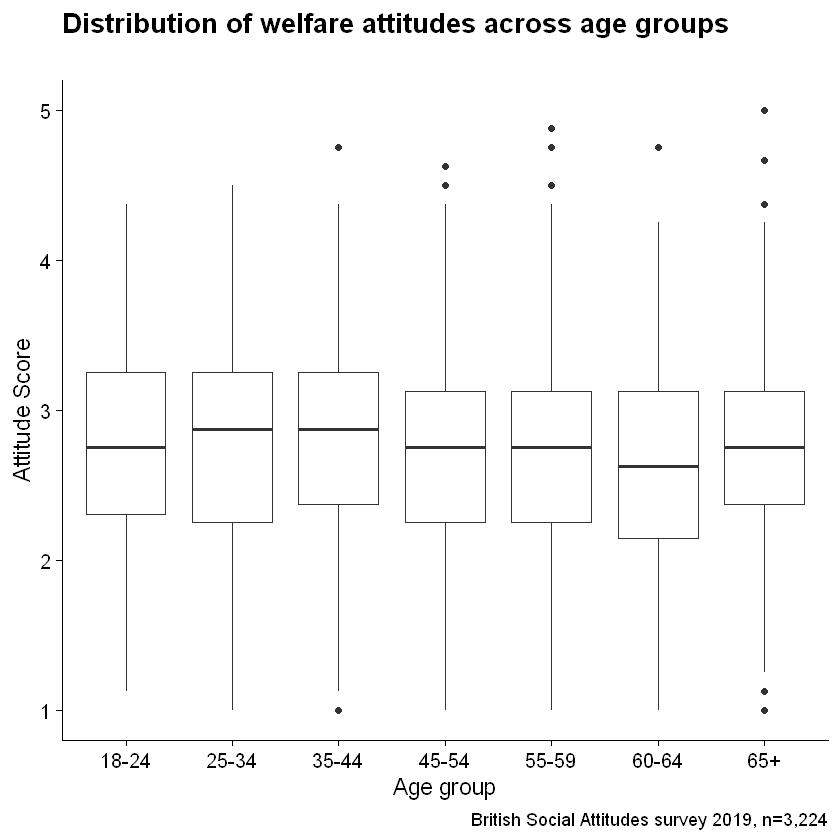

In [141]:
fig4

In [142]:
ggsave("wel-age-plot-2023-11-28.png", plot = fig4, height = 6, width = 8)

Warning message:
"Removed 639 rows containing non-finite values (`stat_boxplot()`)."


#### Numeric & Numeric variables

##### `base R`

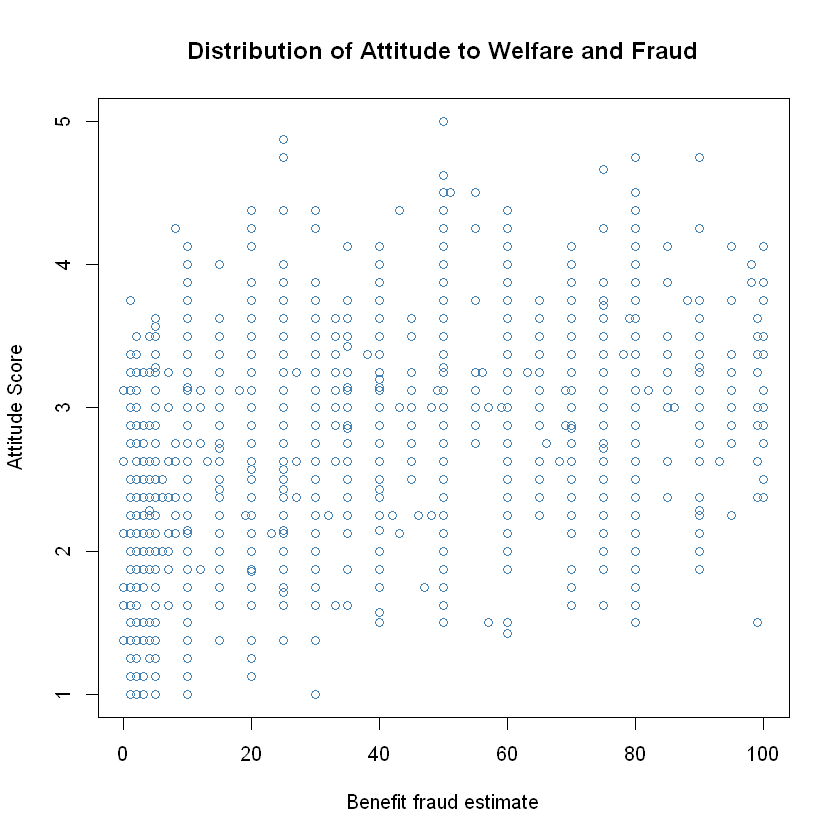

In [148]:
plot(bsa2019$NatFrEst, bsa2019$welfare2, main = "Distribution of Attitude to Welfare and Fraud",
    xlab = "Benefit fraud estimate",
    ylab = "Attitude Score",
    col = "steelblue")

##### `ggplot2`

In [149]:
p <- ggplot(data = bsa2019,
       mapping = aes(x = NatFrEst, y = welfare2))

In [152]:
fig5 <- p + geom_point() + 
    theme_cowplot() +
    labs(x = "Benefit fraud estimate", y = "Attitude Score", title = "Distribution of welfare attitudes and benefit fraud estimate", subtitle = "", 
         caption = "British Social Attitudes survey 2019, n=3,224") # add labels, titles, notes etc

Warning message:
"Removed 812 rows containing missing values (`geom_point()`)."


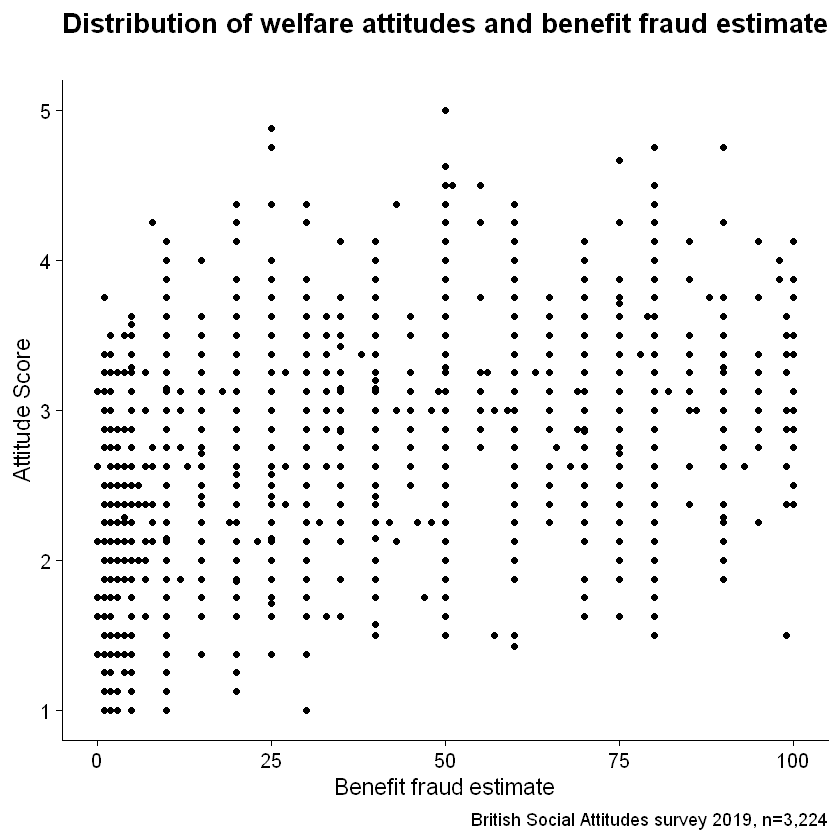

In [153]:
fig5

In [154]:
ggsave("wel-ben-plot-2023-11-28.png", plot = fig5, height = 6, width = 8)

Warning message:
"Removed 812 rows containing missing values (`geom_point()`)."
